In [2]:
import pandas as pd
dt = pd.read_csv(r'C:\Users\anaju\Kuskral\jazz.csv')
dt.head()

,*Vertices 198
0,*Arcs
1,*Edges
2,1 8 1
3,1 24 1
4,1 35 1


In [3]:
class DisjointSet:

    def __init__(self, n):
        self.parent = {i: i for i in range(1, n + 1)}

    # executa a operação MakeSet
    def makeSet(self, n):
        # cria conjuntos disjuntos `n` (um para cada vértice)
        for i in range(int(n)):
            self.parent[i] = i

    # Encontre a raiz do conjunto ao qual o elemento `k` pertence
    def find(self, k):
        # se `k` for root
        if self.parent[k] == k:
            return k

        # recorrente para o pai até encontrarmos a raiz
        return self.find(self.parent[k])

    # Realiza união de dois subconjuntos
    def union(self, a, b):
        # encontra a raiz dos conjuntos aos quais os elementos `x` e `y` pertencem
        x = self.find(a)
        y = self.find(b)

        self.parent[x] = y


# Função para construir MST usando o algoritmo de Kruskal
def runKruskalAlgorithm(edges, n):
    # armazena as arestas presentes no MST
    MST = []

    # Inicializa a classe `DisjointSet`.
    # Crie um conjunto singleton para cada elemento do universo.
    ds = DisjointSet(n)
    ds.makeSet(n)

    index = 0

    # classifica as arestas aumentando o peso
    edges.sort(key=lambda x: x[2])

    # MST contém exatamente bordas `V-1`
    while len(MST) != n - 1:

        # considera a próxima aresta com peso mínimo do gráfico
        (src, dest, weight) = edges[index]
        index = index + 1

        # encontre a raiz dos conjuntos para os quais dois terminais

        # vértices da próxima aresta pertencem
        x = ds.find(src)
        y = ds.find(dest)

        # se ambos os terminais tiverem pais diferentes, eles pertencem a
        # diferentes componentes conectados e podem ser incluídos no MST
        if x != y:
            MST.append((src, dest, weight))
            ds.union(x, y)

    return MST


# Parte principal

with open('jazz.csv') as f:
    lines = f.readlines()

# read number of nodes
_, nodes = lines[0].split('     ')


# create an empty adjacency matrix
graph = {}
for line in lines:
    if line.startswith('*'):
        continue

    src, dest, weight = line.split()
    if src not in graph:
        graph[src] = {}
    if dest not in graph:
        graph[dest] = {}
    graph[src][dest] = weight
    graph[dest][src] = weight

# convert `graph` to a list of edges
edges = []
# (u, v, w) triples representam a borda não direcionada de
# vértice `u` para vértice `v` com peso `w`
for src, neighbors in graph.items():
    for dest, weight in neighbors.items():
        edges.append((int(src), int(dest), int(weight)))

# perform Kruskal's algorithm on the graph
mst = runKruskalAlgorithm(edges, int(nodes))
print(mst)

[(1, 8, 1), (1, 24, 1), (1, 35, 1), (1, 42, 1), (1, 46, 1), (1, 60, 1), (1, 74, 1), (1, 78, 1), (1, 81, 1), (1, 95, 1), (1, 98, 1), (1, 99, 1), (1, 100, 1), (1, 101, 1), (1, 103, 1), (1, 104, 1), (1, 108, 1), (1, 131, 1), (1, 132, 1), (1, 154, 1), (1, 159, 1), (1, 168, 1), (1, 171, 1), (8, 89, 1), (8, 110, 1), (8, 118, 1), (8, 121, 1), (8, 136, 1), (8, 142, 1), (8, 174, 1), (24, 15, 1), (24, 16, 1), (24, 20, 1), (24, 43, 1), (24, 48, 1), (24, 80, 1), (24, 91, 1), (24, 105, 1), (24, 107, 1), (24, 182, 1), (35, 32, 1), (35, 33, 1), (35, 40, 1), (35, 44, 1), (35, 58, 1), (35, 62, 1), (35, 63, 1), (35, 64, 1), (35, 65, 1), (35, 66, 1), (35, 68, 1), (35, 106, 1), (35, 109, 1), (35, 122, 1), (35, 123, 1), (35, 135, 1), (35, 166, 1), (35, 170, 1), (35, 179, 1), (35, 187, 1), (42, 50, 1), (42, 183, 1), (60, 7, 1), (60, 10, 1), (60, 12, 1), (60, 14, 1), (60, 18, 1), (60, 19, 1), (60, 23, 1), (60, 31, 1), (60, 36, 1), (60, 49, 1), (60, 52, 1), (60, 53, 1), (60, 54, 1), (60, 55, 1), (60, 56, 1), 

In [9]:
df = {'from': [], 'to': [], 'peso': []}
# (u, v, w) triples representam a borda não direcionada de
# vértice `u` para vértice `v` com peso `w`
for i in range(len(mst)):
        df['from'].append(mst[i][0])
        df['to'].append(mst[i][1])
        df['peso'].append(mst[i][2])
print(df)
    

{'from': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 8, 8, 8, 8, 8, 8, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 42, 42, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 74, 74, 78, 78, 81, 81, 81, 99, 99, 99, 99, 131, 159, 159, 168, 168, 168, 168, 2, 14, 14, 14, 54, 54, 54, 3, 3, 3, 3, 115, 115, 115, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 5, 77, 77, 189, 189, 189, 53, 136, 136, 149, 155, 6, 70, 185, 38, 30, 119], 'to': [8, 24, 35, 42, 46, 60, 74, 78, 81, 95, 98, 99, 100, 101, 103, 104, 108, 131, 132, 154, 159, 168, 171, 89, 110, 118, 121, 136, 142, 174, 15, 16, 20, 43, 48, 80, 91, 105, 10

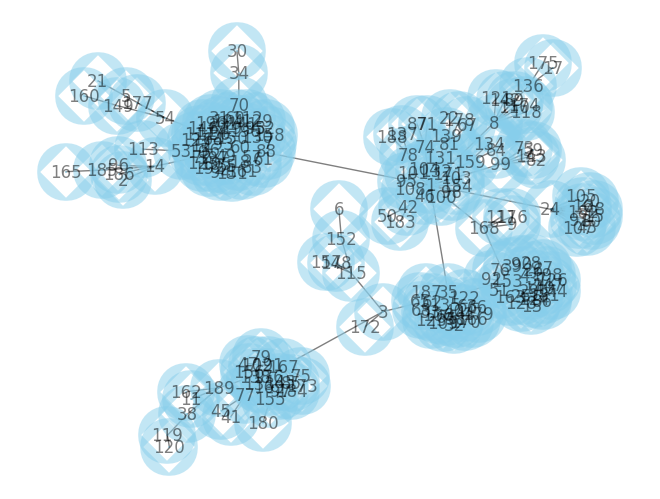

In [10]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Graph with Custom nodes:
nx.draw(G, with_labels=True, node_size=0.9, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40)
plt.show()